In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving seattle-weather.csv to seattle-weather.csv


In [ ]:
df=pd.read_csv('seattle-weather.csv')

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01/01/2012,0.0,12.8,5.0,4.7,drizzle
1,02/01/2012,10.9,10.6,2.8,4.5,rain
2,03/01/2012,0.8,11.7,7.2,2.3,rain
3,04/01/2012,20.3,12.2,5.6,4.7,rain
4,05/01/2012,1.3,8.9,2.8,6.1,rain


In [ ]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['weather']=le.fit_transform(df['weather'])

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('weather',axis=1)
y=df['weather']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_numeric = x.drop('date', axis=1)
x=sc.fit_transform(x_numeric)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train=pd.DataFrame(x_train,columns=x_numeric.columns)
x_test=pd.DataFrame(x_test,columns=x_numeric.columns)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=lr.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7781569965870307


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[  0   0   1   0   8]
 [  0   0   2   0  23]
 [  0   0 102   0  18]
 [  0   0   6   1   1]
 [  0   0   6   0 125]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.87      0.85      0.86       120
           3       1.00      0.12      0.22         8
           4       0.71      0.95      0.82       131

    accuracy                           0.78       293
   macro avg       0.52      0.39      0.38       293
weighted avg       0.70      0.78      0.72       293



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


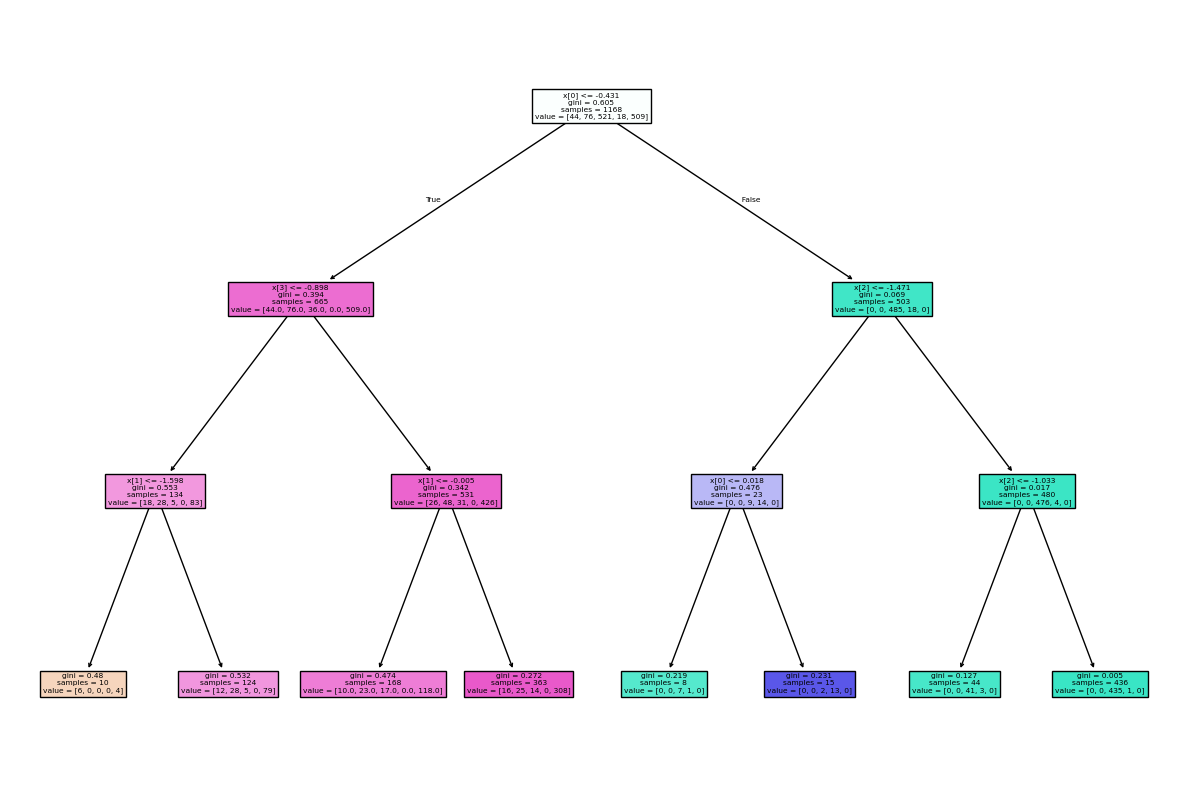

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train, y_train)
plt.figure(figsize=(15,10))
plot_tree(tree,filled=True) # Corrected line: calling the function plot_tree directly
plt.show()

0.7986348122866894


<Figure size 1500x1000 with 0 Axes>

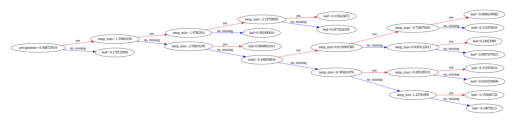

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree # This import is for sklearn's plot_tree

xgb_model=xgb.XGBClassifier() # Renamed variable to avoid conflict with imported module
xgb_model.fit(x_train,y_train)
y_pred=xgb_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

plt.figure(figsize=(15,10))
xgb.plot_tree(xgb_model, rankdir='LR') # Corrected: using xgboost's plot_tree and passing the model
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 245
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 4
[LightGBM] [Info] Start training from score -3.278859
[LightGBM] [Info] Start training from score -2.732315
[LightGBM] [Info] Start training from score -0.807298
[LightGBM] [Info] Start training from score -4.172676
[LightGBM] [Info] Start training from score -0.830600
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

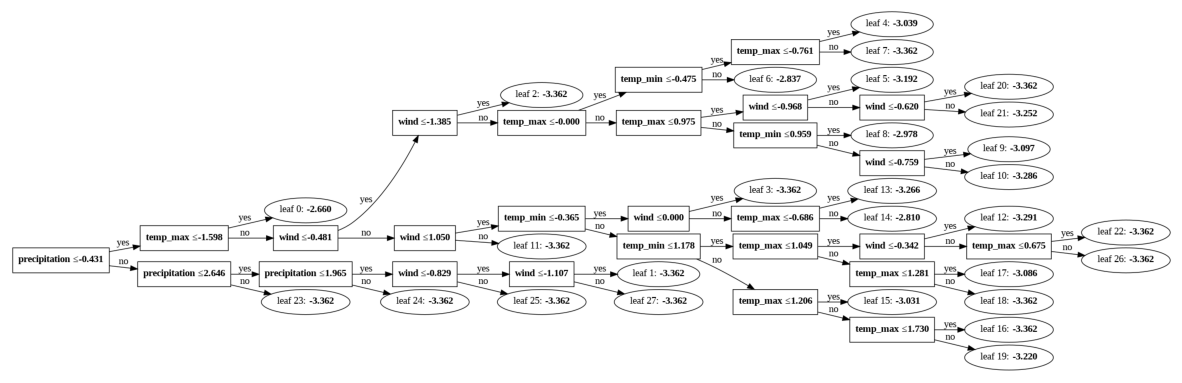

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
lgb_model=lgb.LGBMClassifier()
lgb_model.fit(x_train,y_train)
y_pred=lgb_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

plt.figure(figsize=(15,10))
lgb.plot_tree(lgb_model,ax=plt.gca())
plt.show()

Learning rate set to 0.079756
0:	learn: 1.4133055	total: 2.63ms	remaining: 2.63s
1:	learn: 1.2779234	total: 5.42ms	remaining: 2.71s
2:	learn: 1.1708897	total: 7.29ms	remaining: 2.42s
3:	learn: 1.0826327	total: 8.54ms	remaining: 2.13s
4:	learn: 1.0094948	total: 10.4ms	remaining: 2.07s
5:	learn: 0.9495315	total: 12.3ms	remaining: 2.04s
6:	learn: 0.8980685	total: 14.1ms	remaining: 2s
7:	learn: 0.8544898	total: 16ms	remaining: 1.99s
8:	learn: 0.8199932	total: 17.9ms	remaining: 1.97s
9:	learn: 0.7857679	total: 19.7ms	remaining: 1.95s
10:	learn: 0.7582114	total: 21.6ms	remaining: 1.94s
11:	learn: 0.7335830	total: 23.4ms	remaining: 1.93s
12:	learn: 0.7092196	total: 25.2ms	remaining: 1.92s
13:	learn: 0.6882528	total: 27.1ms	remaining: 1.91s
14:	learn: 0.6698255	total: 29ms	remaining: 1.9s
15:	learn: 0.6514102	total: 30.9ms	remaining: 1.9s
16:	learn: 0.6339112	total: 32.8ms	remaining: 1.89s
17:	learn: 0.6190409	total: 34.6ms	remaining: 1.89s
18:	learn: 0.6053726	total: 36.4ms	remaining: 1.88s
1

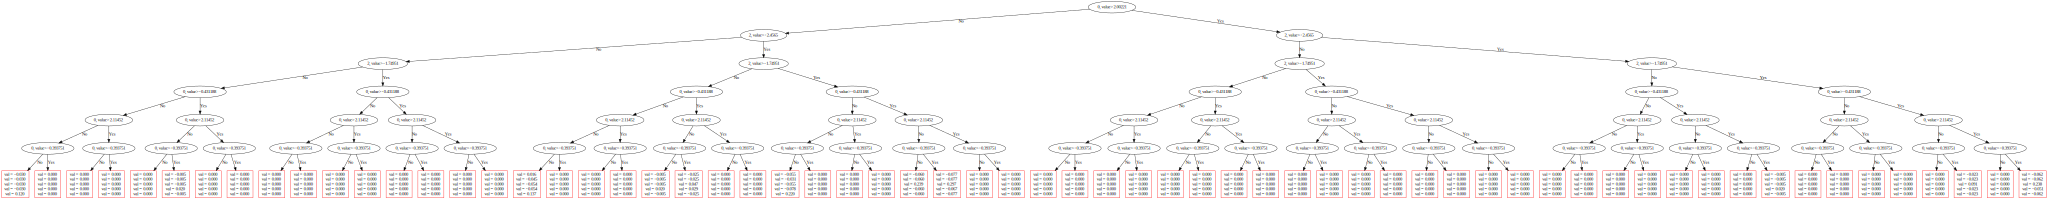

In [ ]:
!pip install catboost
import catboost as cb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

cat = cb.CatBoostClassifier()
cat.fit(x_train, y_train)
y_pred = cat.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Correct way to plot a tree from CatBoost
cat.plot_tree(tree_idx=0)

0.8156996587030717
Accuracy: 0.8156996587030717


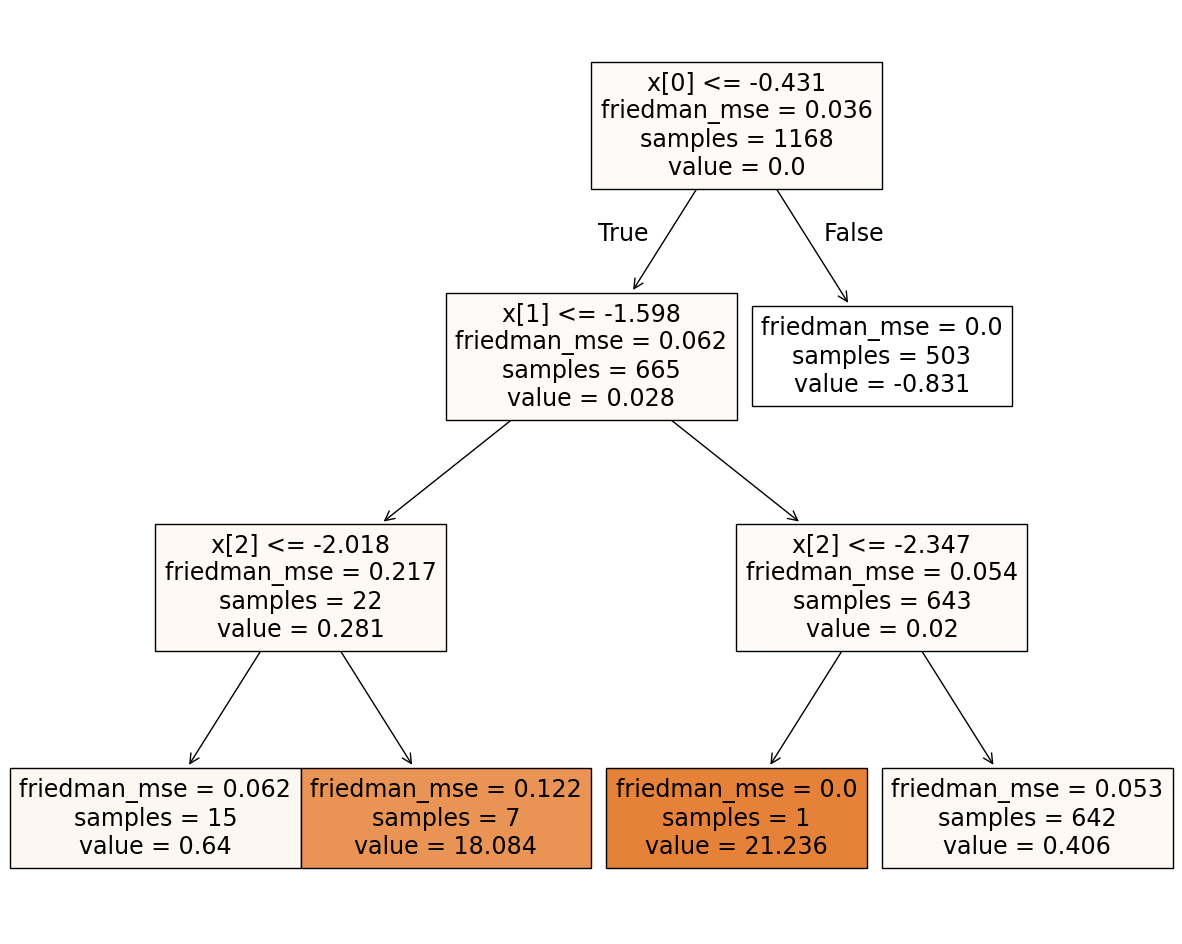

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

SEED = 42
gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(15,12))
# Plotting the first tree from the ensemble (assuming multi-class output)
plot_tree(gb.estimators_[0, 0] ,filled=True, ax=plt.gca())
plt.show()

<Axes: >

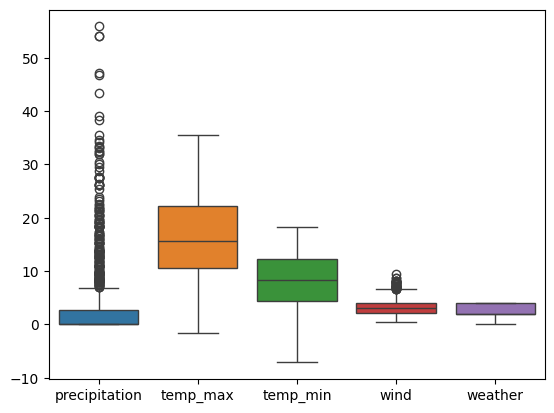

In [ ]:
sns.boxplot(data=df)

<Axes: xlabel='weather', ylabel='wind'>

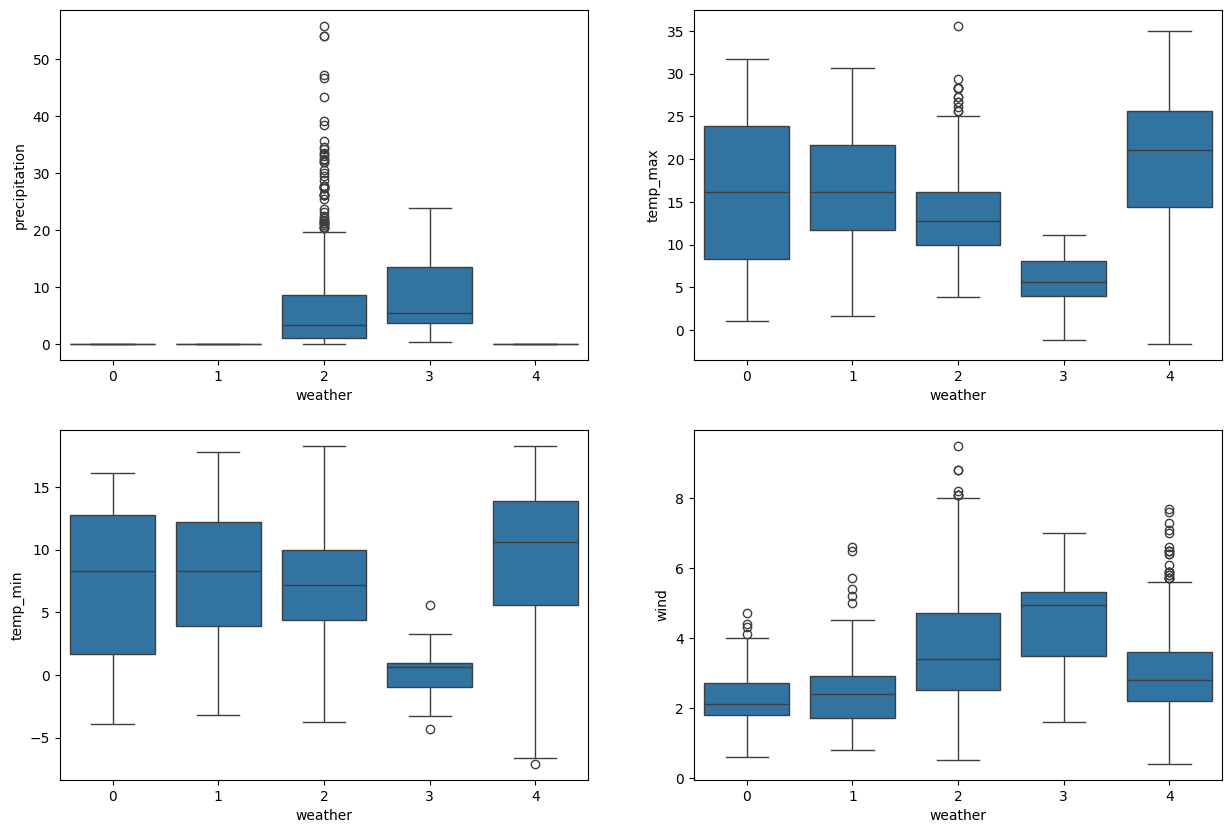

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='weather',y='precipitation',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='weather',y='temp_max',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='weather',y='temp_min',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='weather',y='wind',data=df)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_numeric=df.drop(['date','weather'],axis=1)
x=sc.fit_transform(x_numeric)

df_scaled=pd.DataFrame(x,columns=x_numeric.columns)

In [ ]:
df_scaled.head()

,precipitation,temp_max,temp_min,wind
0,-0.453650,-0.495299,-0.644212,1.014980
1,1.178598,-0.794731,-1.082347,0.875833
2,-0.333852,-0.645015,-0.206077,-0.654780
3,2.586224,-0.576962,-0.524720,1.014980
4,-0.258978,-1.026111,-1.082347,1.989006


<Axes: >

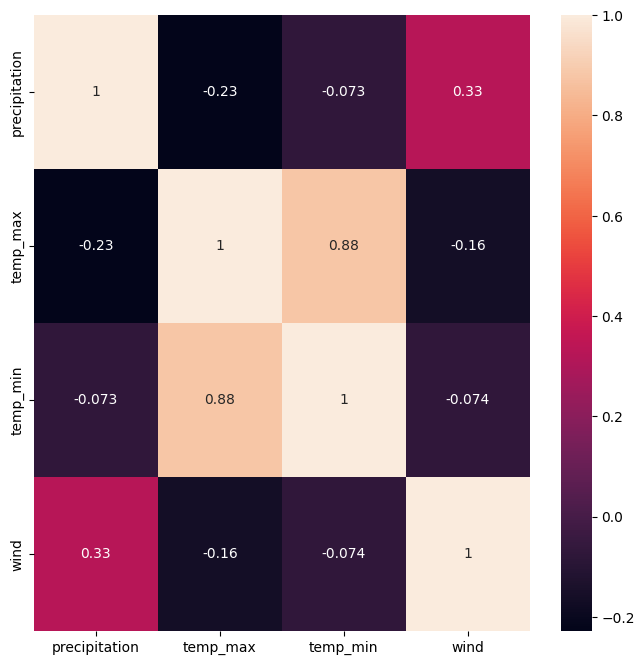

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_scaled.corr(),annot=True)


Text(0, 0.5, 'temp_min')

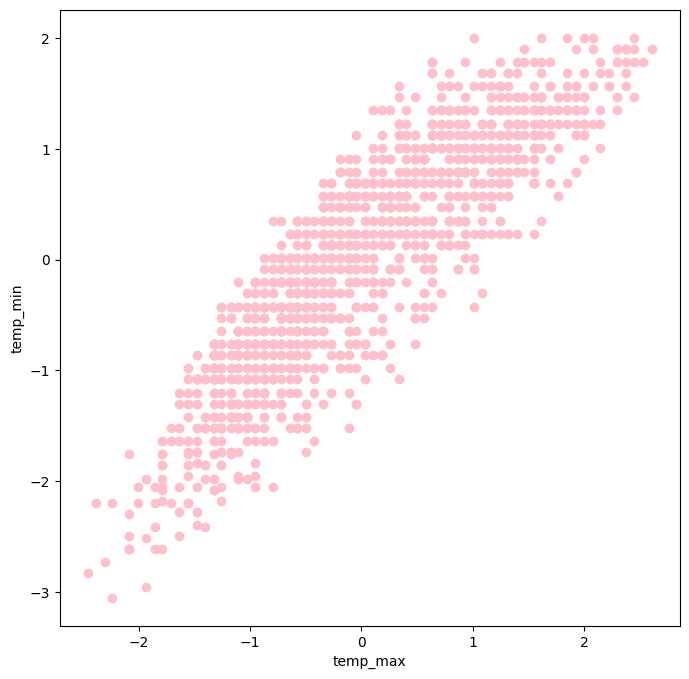

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df_scaled['temp_max'],df_scaled['temp_min'],color='pink')
plt.xlabel('temp_max')
plt.ylabel('temp_min')

<Axes: xlabel='weather', ylabel='temp_max'>

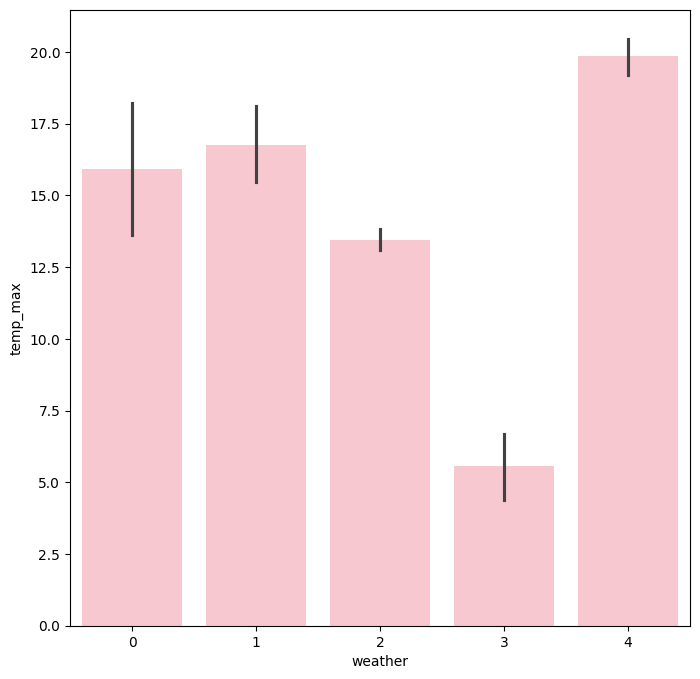

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='weather',y='temp_max',color='pink',data=df)

[5844.000000000002]
[5844.000000000002, 3726.8641656818695]
[5844.000000000002, 3726.8641656818695, 2677.7650491792824]
[5844.000000000002, 3726.8641656818695, 2677.7650491792824, 2063.65641309279]
[5844.000000000002, 3726.8641656818695, 2677.7650491792824, 2063.65641309279, 1778.6614092676934]
[5844.000000000002, 3726.8641656818695, 2677.7650491792824, 2063.65641309279, 1778.6614092676934, 1606.9079064336945]
[5844.000000000002, 3726.8641656818695, 2677.7650491792824, 2063.65641309279, 1778.6614092676934, 1606.9079064336945, 1467.5064616578986]
[5844.000000000002, 3726.8641656818695, 2677.7650491792824, 2063.65641309279, 1778.6614092676934, 1606.9079064336945, 1467.5064616578986, 1354.3462235794898]
[5844.000000000002, 3726.8641656818695, 2677.7650491792824, 2063.65641309279, 1778.6614092676934, 1606.9079064336945, 1467.5064616578986, 1354.3462235794898, 1281.815940215426]
[5844.000000000002, 3726.8641656818695, 2677.7650491792824, 2063.65641309279, 1778.6614092676934, 1606.9079064336

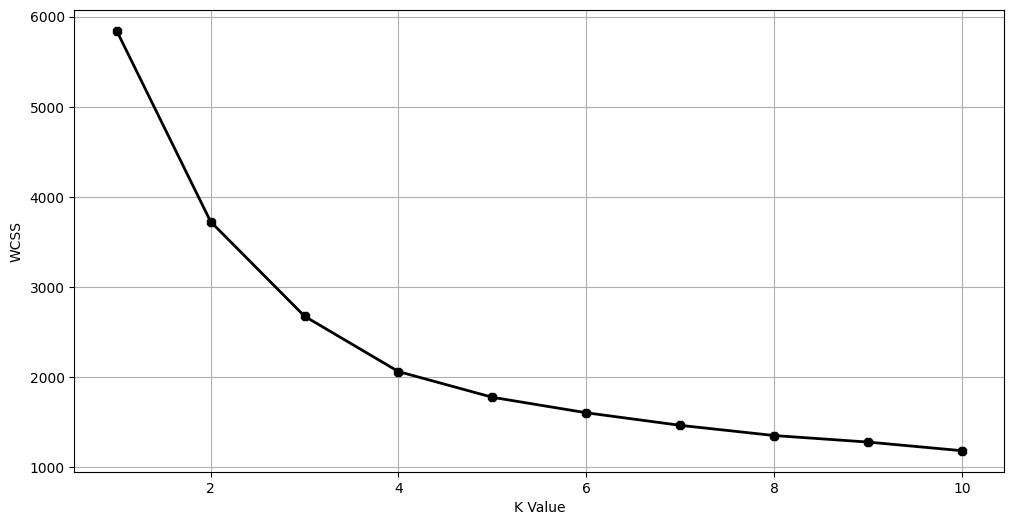

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)
  print(wcss)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='black',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8088737201365188
[[  1   0   0   0   8]
 [  0   2   1   0  22]
 [  0   0 110   3   7]
 [  0   0   6   2   0]
 [  4   5   0   0 122]]
              precision    recall  f1-score   support

           0       0.20      0.11      0.14         9
           1       0.29      0.08      0.12        25
           2       0.94      0.92      0.93       120
           3       0.40      0.25      0.31         8
           4       0.77      0.93      0.84       131

    accuracy                           0.81       293
   macro avg       0.52      0.46      0.47       293
weighted avg       0.77      0.81      0.78       293



<Axes: xlabel='weather', ylabel='count'>

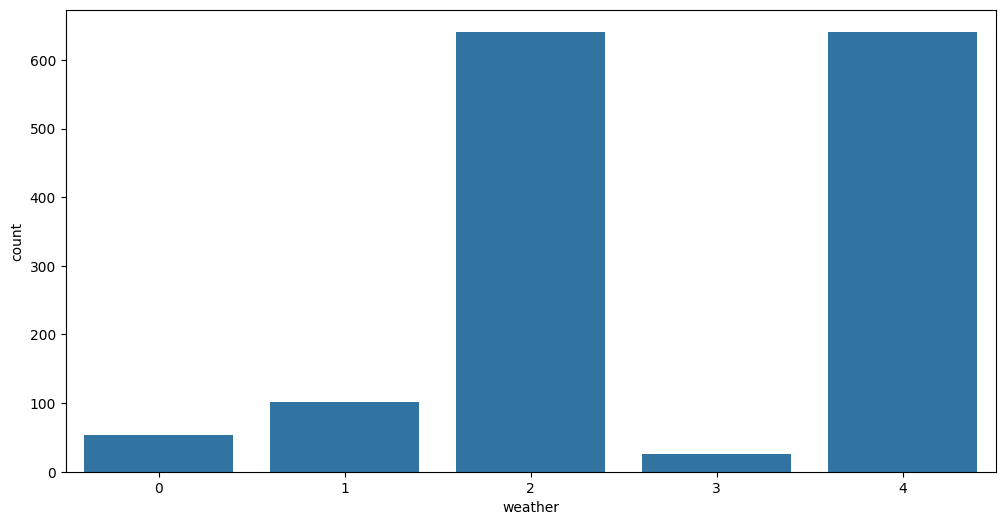

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['weather'].value_counts().index,y=df['weather'].value_counts())
